In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [16]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
x = df[['highway-mpg']]
y = df[['price']]
lm.fit(x,y)
yhat = lm.predict(x)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [6]:
# intercept value a
lm.intercept_

array([38423.30585816])

In [7]:
# slope value b
lm.coef_

array([[-821.73337832]])

In [8]:
# y = a + bx
yhat = 38423.31 - 821.73 * x
yhat

,highway-mpg
0,16236.60
1,16236.60
2,17058.33
3,13771.41
4,20345.25
...,...
196,15414.87
197,17880.06
198,19523.52
199,16236.60


In [17]:
# Multiple Linear Regression
lm = LinearRegression()
z = df[['normalized-losses','highway-mpg']]
lm.fit(z,df[['price']])
yhat = lm.predict(z)
a = lm.intercept_
b = lm.coef_

In [10]:
b

array([[   1.49789586, -820.45434016]])

In [14]:
yhat = a + (b[0][0] * df['normalized-losses']) + (b[0][1] * df['highway-mpg'])
yhat

0      16231.789383
1      16231.789383
2      17052.243724
3      13833.337989
4      20396.972710
           ...     
196    15370.891855
197    17832.254875
198    19473.163556
199    16191.346195
200    17832.254875
Length: 201, dtype: float64

In [16]:
# model evaluation using visualization
import seaborn as sns
%matplotlib inline

(0, 48267.380686474775)

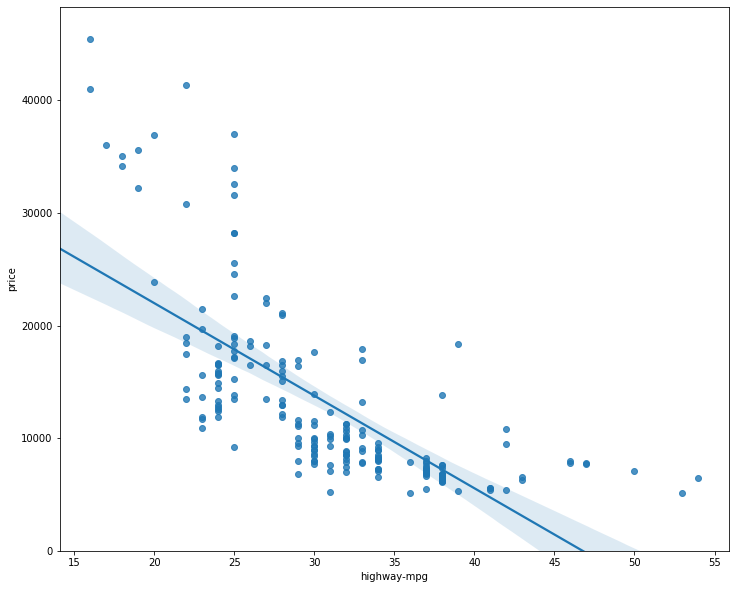

In [17]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x ="highway-mpg",y ='price',data = df)
plt.ylim(0)

(0, 47422.919330307624)

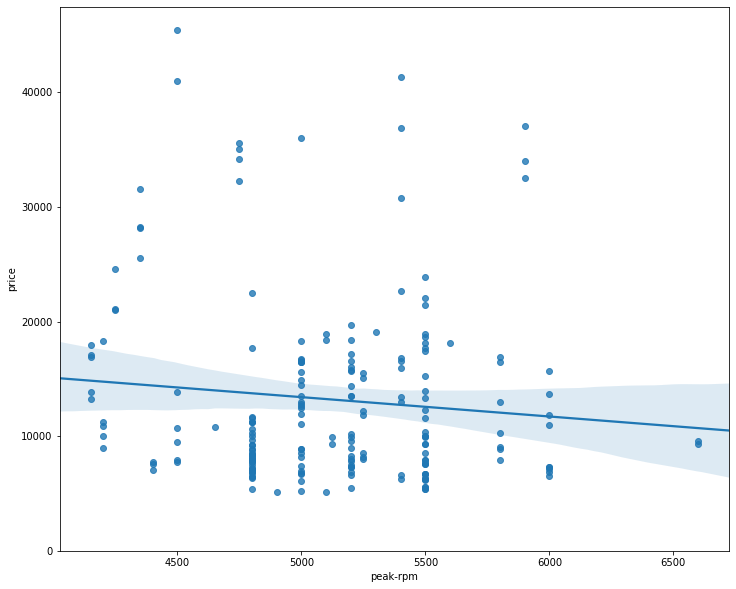

In [18]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [19]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


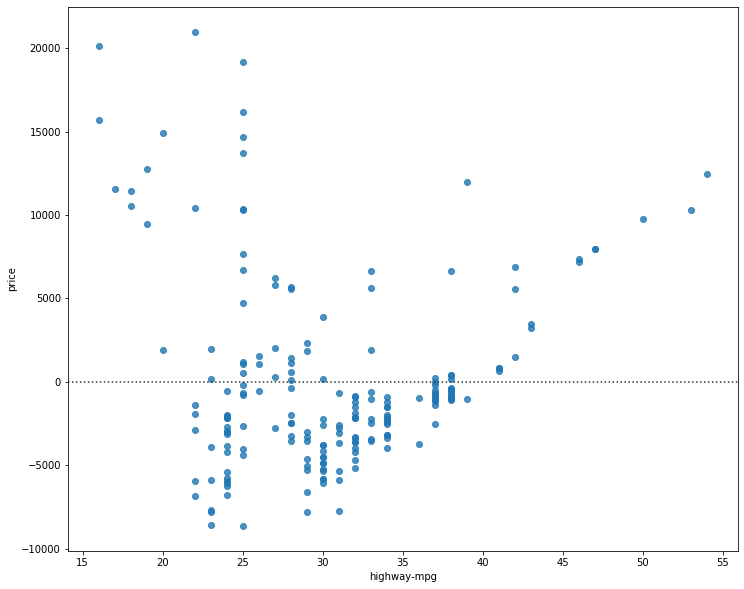

In [20]:
#A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis
#If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data
#Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

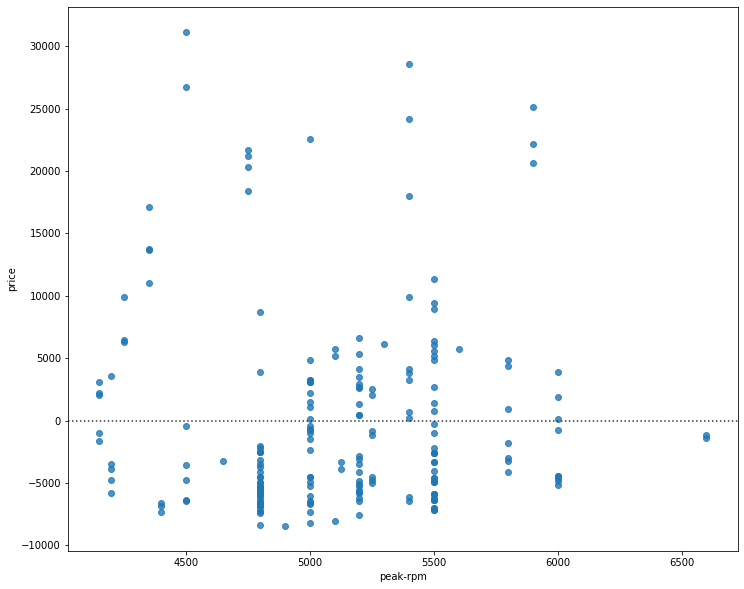

In [21]:
plt.figure(figsize=(width, height))
sns.residplot(df['peak-rpm'], df['price'])
plt.show()

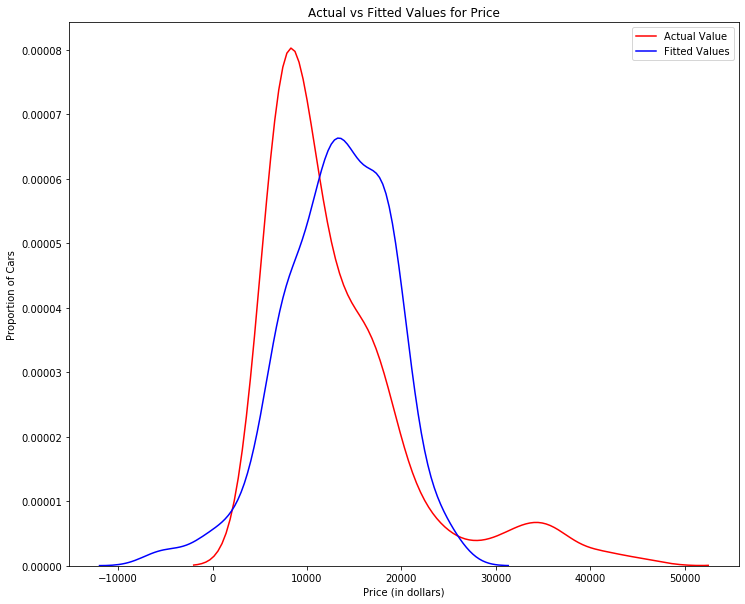

In [25]:
#visualize a model for Multiple Linear Regression
#the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the 
#distribution of the actual values.

Yhat = lm.predict(z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [1]:
def PlotPolly(model,independent_variable,dependent_variable,name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title("Polynomial fit with matplotlib")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('price of cars')
    plt.show()
    plt.close()

In [6]:
# polynomial of the 3rd order (cubic)
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3) #function
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


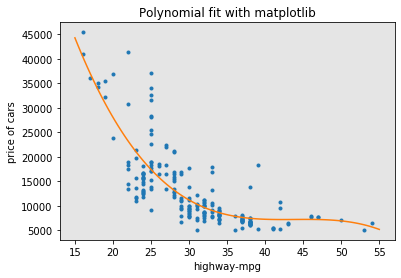

In [8]:
# plot the function 
PlotPolly(p,x,y,'highway-mpg')
# this model is better than linear model for this property; because hits more data points

In [10]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


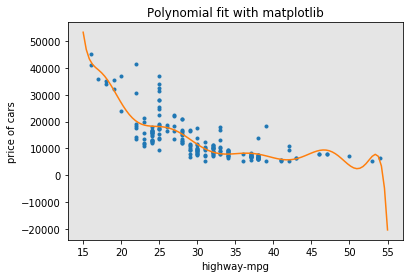

In [11]:
PlotPolly(p1,x,y,'highway-mpg')

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [22]:
z_pr = pr.fit_transform(z)

In [23]:
z.shape

(201, 2)

In [24]:
z_pr.sahpe

AttributeError: 'numpy.ndarray' object has no attribute 'sahpe'

In [25]:
# pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [28]:
#normalize the data, perform a transform and fit the model simultaneously
pipe.fit(z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [29]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe = pipe.predict(z)
ypipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

In [32]:
#Create a pipeline that Standardizes the data perform prediction using a linear regression model 
#using the features Z and targets y

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(z,y)

ypipe=pipe.predict(z)
ypipe[0:10]


array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047, 17872.69806371, 17926.6223148 , 17872.69806371,
       22028.89401561, 14695.7334135 ])

In [35]:
#Two very important measures that are often used in Statistics to determine the accuracy of a model are
# R^2 / R-squared - Mean Squared Error (MSE)

#R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line
#The value of the R-squared is the percentage of variation of the response variable (y)

#~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

x = df[['highway-mpg']]
y = df[['price']]
lm.fit(x,y)
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339175


In [37]:
yhat=lm.predict(x)
yhat[0:4]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ]])

In [39]:
#compare the predicted results with the actual results
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [43]:
#We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093562806577457


In [44]:
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [45]:
#polynomial fit
#We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [46]:
mean_squared_error(df['price'], p(x))

20474146.42636125

In [47]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(x, y)
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

In [48]:
yhatest = lm.predict(x)
yhatest[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

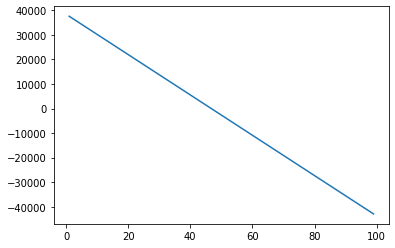

In [49]:
plt.plot(new_input,yhat)
plt.show()

In [ ]:
#Decision Making
#When comparing models, the model with the higher R-squared value is a better fit for the data
#When comparing models, the model with the smallest MSE value is a better fit for the data.